In [1]:
import pandas as pd 
import numpy as np


In [3]:
glass = pd.read_csv("glass.csv")
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(glass,test_size = 0.2)

In [10]:
# KNN using sklearn 
# import the KNN algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC 
# for 3 nearest neighbors 
neigh = KNC(n_neighbors=3)

In [12]:
# fitting with the training data 
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])

KNeighborsClassifier(n_neighbors=3)

In [14]:
# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])

In [15]:
# test accuracy 
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])== test.iloc[:,9])

In [16]:
print(test_acc)

0.7906976744186046


In [17]:
print(train_acc)

0.8128654970760234


In [23]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])




In [25]:
print(acc)

[[0.8128654970760234, 0.7906976744186046], [0.7192982456140351, 0.6976744186046512], [0.7017543859649122, 0.6976744186046512], [0.6491228070175439, 0.7209302325581395], [0.6666666666666666, 0.6976744186046512], [0.6608187134502924, 0.7209302325581395], [0.6608187134502924, 0.7209302325581395], [0.631578947368421, 0.7441860465116279], [0.6374269005847953, 0.6976744186046512], [0.6257309941520468, 0.7209302325581395], [0.6081871345029239, 0.6976744186046512], [0.5906432748538012, 0.6976744186046512], [0.5906432748538012, 0.6976744186046512], [0.5964912280701754, 0.6744186046511628], [0.5789473684210527, 0.627906976744186], [0.5847953216374269, 0.627906976744186], [0.5906432748538012, 0.627906976744186], [0.5847953216374269, 0.6744186046511628], [0.5789473684210527, 0.6511627906976745], [0.5789473684210527, 0.6511627906976745], [0.5847953216374269, 0.627906976744186], [0.5614035087719298, 0.6046511627906976], [0.5672514619883041, 0.5813953488372093], [0.5614035087719298, 0.604651162790697

<ipython-input-24-771f405d4260>:9: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("train","test")
<ipython-input-24-771f405d4260>:9: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("train","test")
<ipython-input-24-771f405d4260>:9: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("train","test")
<ipython-input-24-771f405d4260>:9: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.htm

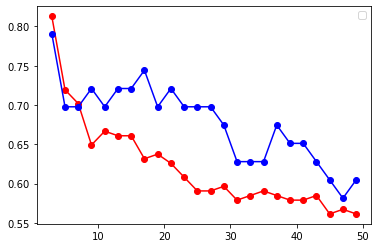

In [24]:
import matplotlib.pyplot as plt 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot 
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")

plt.legend("train","test")

plt.show()